# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"
base_url = f"{url}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

   ##### # Create endpoint URL with each city
    city_url = url + city+"&appid="+ weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | oranjemund
Processing Record 4 of Set 1 | sapulpa
Processing Record 5 of Set 1 | x-can
City not found. Skipping...
Processing Record 6 of Set 1 | ayan
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | muisne
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | alamos
Processing Record 12 of Set 1 | sola
Processing Record 13 of Set 1 | puqi
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | half moon bay
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | knysna
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | funtua
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | haibowan

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,286.38,78,92,4.52,PT,1675825758
1,longyearbyen,78.2186,15.6401,269.06,68,40,8.75,SJ,1675825700
2,oranjemund,-28.5500,16.4333,290.55,90,99,6.87,NA,1675825795
3,sapulpa,35.9987,-96.1142,278.99,92,100,2.06,US,1675825795
4,ayan,56.4500,138.1667,246.31,58,26,2.98,RU,1675825796


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,286.38,78,92,4.52,PT,1675825758
1,longyearbyen,78.2186,15.6401,269.06,68,40,8.75,SJ,1675825700
2,oranjemund,-28.5500,16.4333,290.55,90,99,6.87,NaN,1675825795
3,sapulpa,35.9987,-96.1142,278.99,92,100,2.06,US,1675825795
4,ayan,56.4500,138.1667,246.31,58,26,2.98,RU,1675825796


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

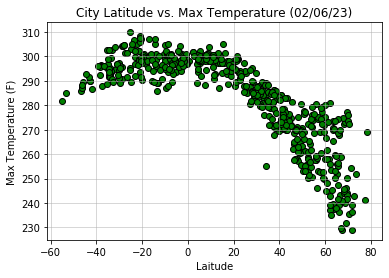

In [10]:
# Build scatter plot for latitude vs. temperature
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (02/06/23)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

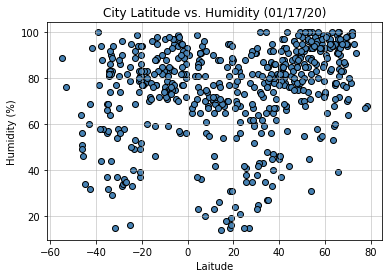

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

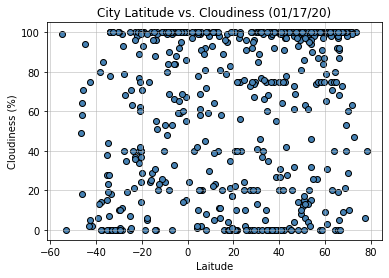

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

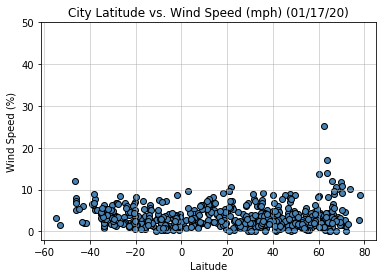

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round((x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,286.38,78,92,4.52,PT,1675825758
1,longyearbyen,78.2186,15.6401,269.06,68,40,8.75,SJ,1675825700
3,sapulpa,35.9987,-96.1142,278.99,92,100,2.06,US,1675825795
4,ayan,56.4500,138.1667,246.31,58,26,2.98,RU,1675825796
6,muisne,0.6000,-80.0333,298.15,90,24,2.10,EC,1675825607


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,oranjemund,-28.5500,16.4333,290.55,90,99,6.87,NaN,1675825795
5,ushuaia,-54.8000,-68.3000,281.94,89,99,3.16,AR,1675825605
9,sola,-13.8833,167.5500,301.00,77,96,6.44,VU,1675825800
13,avarua,-21.2078,-159.7750,302.18,74,34,4.63,CK,1675825615
14,mataura,-46.1927,168.8643,287.64,51,64,5.22,NZ,1675825613


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : City_ID
0      37.72
1      78.22
3      36.00
4      56.45
6       0.60
       ...  
546    65.70
547    51.10
551    60.24
552    40.81
553    58.00
Name: Lat, Length: 375, dtype: float64


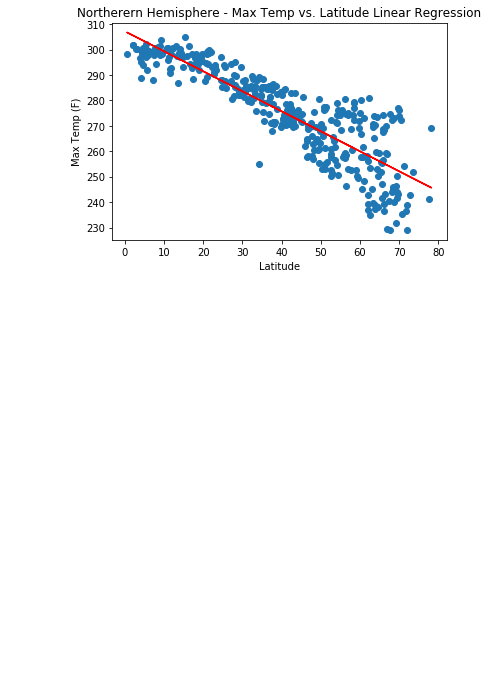

In [17]:
# Linear regression on Northern Hemisphere
# Linear regression on Southern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Northerern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Notherern Hemisphere - Temp vs. Latitude Linear Regression.png")

The r-squared is : City_ID
2     -28.55
5     -54.80
9     -13.88
13    -21.21
14    -46.19
       ...  
542    -8.16
544   -14.66
548   -34.65
549   -20.28
550   -29.68
Name: Lat, Length: 179, dtype: float64


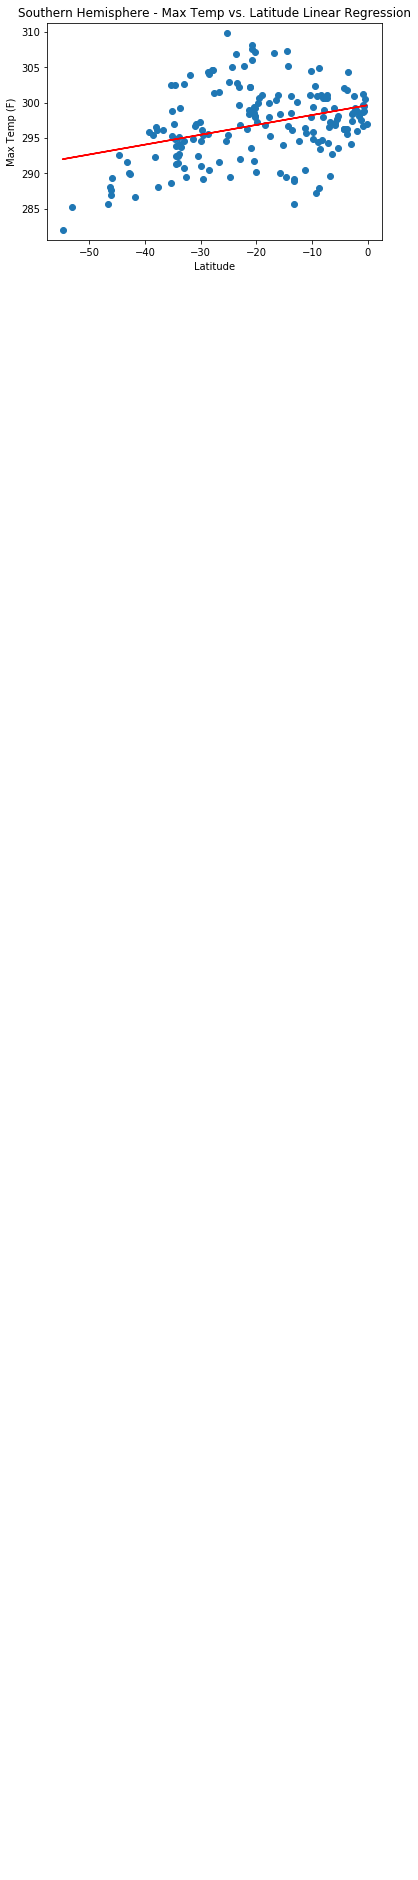

In [31]:
# Linear regression on Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -40, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Temp vs. Latitude Linear Regression.png")

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : City_ID
0      37.72
1      78.22
3      36.00
4      56.45
6       0.60
       ...  
546    65.70
547    51.10
551    60.24
552    40.81
553    58.00
Name: Lat, Length: 375, dtype: float64


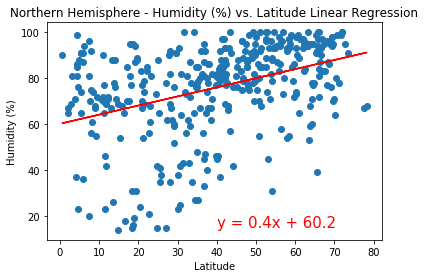

In [19]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : City_ID
2     -28.55
5     -54.80
9     -13.88
13    -21.21
14    -46.19
       ...  
542    -8.16
544   -14.66
548   -34.65
549   -20.28
550   -29.68
Name: Lat, Length: 179, dtype: float64


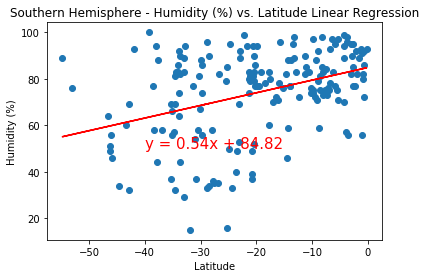

In [20]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : City_ID
0      37.72
1      78.22
3      36.00
4      56.45
6       0.60
       ...  
546    65.70
547    51.10
551    60.24
552    40.81
553    58.00
Name: Lat, Length: 375, dtype: float64


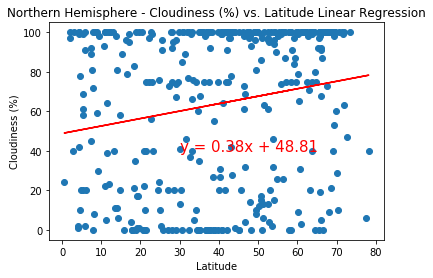

In [21]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : City_ID
2     -28.55
5     -54.80
9     -13.88
13    -21.21
14    -46.19
       ...  
542    -8.16
544   -14.66
548   -34.65
549   -20.28
550   -29.68
Name: Lat, Length: 179, dtype: float64


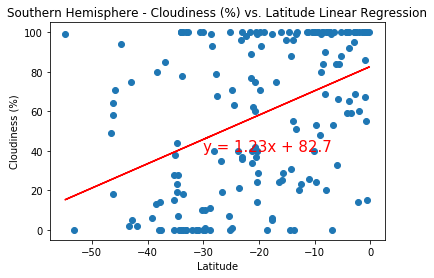

In [22]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : City_ID
0      37.72
1      78.22
3      36.00
4      56.45
6       0.60
       ...  
546    65.70
547    51.10
551    60.24
552    40.81
553    58.00
Name: Lat, Length: 375, dtype: float64


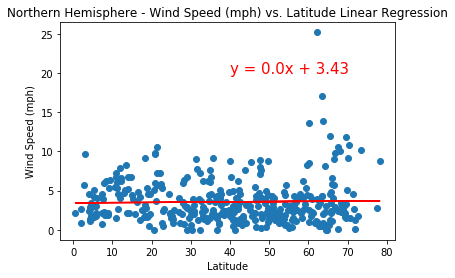

In [23]:
# Northern Hemisphere

# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : City_ID
2     -28.55
5     -54.80
9     -13.88
13    -21.21
14    -46.19
       ...  
542    -8.16
544   -14.66
548   -34.65
549   -20.28
550   -29.68
Name: Lat, Length: 179, dtype: float64


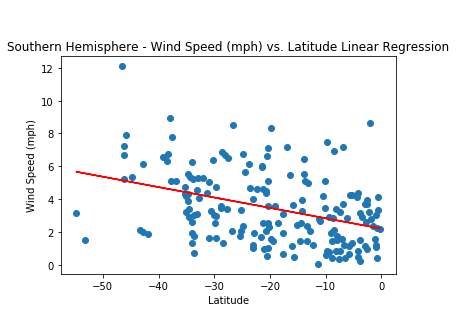

In [24]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")